## Napari Notebook for labeling

This notebook opens an image in napari. Saving and all labeling is done on the napari interface. Preprocessing to better see the image is also included, but is not saved. 

<ipython-input-15-c5a46a4369e8>:16: RuntimeWarning: divide by zero encountered in log
  img_log = np.log(img + 0.5)
/Users/morganaire/opt/anaconda3/envs/napari-env/lib/python3.8/site-packages/napari/_vispy/vispy_camera.py:109: RuntimeWarning: divide by zero encountered in true_divide
  zoom = np.min(canvas_size / scale)


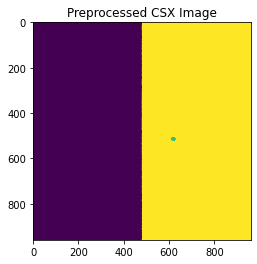

In [15]:
from skimage import data
import numpy as np
import napari
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats


img = np.load("/Users/morganaire/Documents/BNL/unet/CSX_photons/S_141798_mean_10.npy")

#In the future, might need a better way to deal with exceptionally large points. Set to zero for napari
img = np.where(img > 10000, 0, img)


#Preprocessing: using log, filtering large values, and box cox
img_log = np.log(img + 0.5)
img_log = np.nan_to_num(img_log)
img_log = np.where(np.abs(img_log) > 1000, 0, img_log)

min_val = np.min(img_log)
box_cox, l = stats.boxcox(img_log.flatten()+min_val+1)


#Plotting (for reference with Napari)
plt.imshow(img_log, vmin = 0, vmax = 1)
plt.title("Preprocessed CSX Image")

#To view in napari
viewer = napari.view_image(img_log)


